In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
print("Bắt đầu quá trình huấn luyện mô hình...")

# --- 1. Tải và Đọc Dữ liệu ---
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']
try:
    # CODE ĐÃ SỬA: Thêm 'r' vào trước chuỗi sep
    df = pd.read_csv('../data/adult.data', header=None, names=columns, na_values=' ?', sep=r',\s*', engine='python')
except FileNotFoundError:
    print("LỖI: Không tìm thấy file 'adult.data'. Vui lòng tải về.")
    exit()  

Bắt đầu quá trình huấn luyện mô hình...


In [4]:
# --- 2. Tiền xử lý Dữ liệu (Data Preprocessing) ---
print("Đang tiền xử lý dữ liệu...")
# Xóa các hàng có giá trị bị thiếu
df = df.dropna()

# Bỏ cột 'fnlwgt' vì nó không hữu ích cho việc dự đoán
df = df.drop('fnlwgt', axis=1)

# Xử lý cột mục tiêu (income)
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
# ('<=50K' sẽ là 0, '>50K' sẽ là 1)

# Tách X (đặc trưng) và y (nhãn)
X = df.drop('income', axis=1)
y = df['income']

# Xác định các cột dạng chữ để One-Hot Encoding
categorical_cols = X.select_dtypes(include=['object']).columns

# Áp dụng One-Hot Encoding
X_processed = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Lưu lại danh sách các cột đã xử lý (RẤT QUAN TRỌNG)
# Web app sẽ cần file này để biết cách xử lý dữ liệu đầu vào
model_columns = list(X_processed.columns)
joblib.dump(model_columns, '../model/model_columns.joblib')
print(f"Đã lưu danh sách {len(model_columns)} cột vào 'model_columns.joblib'")

Đang tiền xử lý dữ liệu...
Đã lưu danh sách 99 cột vào 'model_columns.joblib'


In [6]:
# --- 3. Chia và Huấn luyện Mô hình (Decision Tree) ---
print("Đang huấn luyện mô hình Decision Tree...")
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Lưu mô hình đã huấn luyện
joblib.dump(model, '../model/adult_model.joblib')
print("Đã lưu mô hình vào 'adult_model.joblib'")

Đang huấn luyện mô hình Decision Tree...
Đã lưu mô hình vào 'adult_model.joblib'


In [7]:
# --- 4. Xuất 2 OUTPUT theo yêu cầu ---

# OUTPUT 1: Tính toán và In ra Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("---------------------------------------------------------")
print(f"✅ OUTPUT 1: Accuracy của mô hình = {accuracy * 100:.2f}%")
print("---------------------------------------------------------")

---------------------------------------------------------
✅ OUTPUT 1: Accuracy của mô hình = 81.77%
---------------------------------------------------------


Đang tạo biểu đồ Feature Importance...
✅ OUTPUT 2: Đã lưu biểu đồ vào 'feature_importance.png'
--- Quá trình huấn luyện hoàn tất! ---


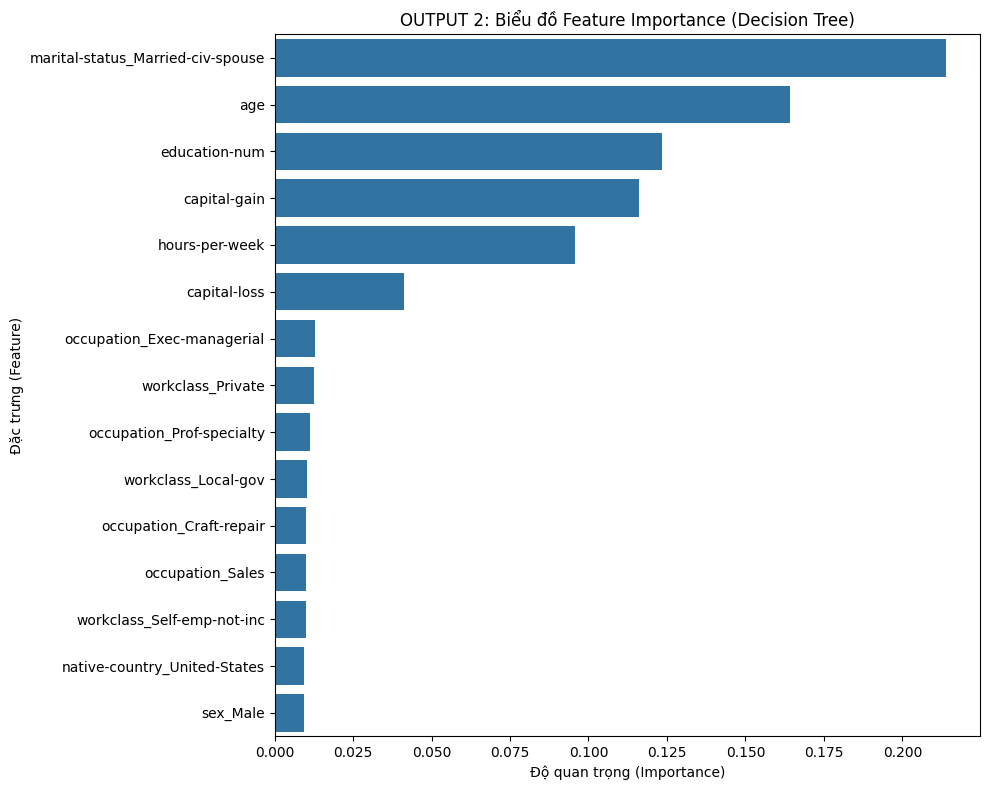

In [8]:
# OUTPUT 2: Vẽ và Lưu Biểu đồ Feature Importance
print("Đang tạo biểu đồ Feature Importance...")
importances = model.feature_importances_
feature_names = X_processed.columns

feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15)) # Lấy 15 đặc trưng hàng đầu
plt.title('OUTPUT 2: Biểu đồ Feature Importance (Decision Tree)')
plt.xlabel('Độ quan trọng (Importance)')
plt.ylabel('Đặc trưng (Feature)')
plt.tight_layout()

# Lưu biểu đồ thành file ảnh
plt.savefig('../model/feature_importance.png')
print("✅ OUTPUT 2: Đã lưu biểu đồ vào 'feature_importance.png'")
print("--- Quá trình huấn luyện hoàn tất! ---")